## Load and Prepare Datasets

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')


print("df_vix head:")
print(df_vix.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
df_vix head:
        date  VIXCLS
0 1990-01-02   17.24
1 1990-01-03   18.19
2 1990-01-04   19.22
3 1990-01-05   20.11
4 1990-01-08   20.26


In [ ]:
import pandas as pd

# Load VIXCLS.csv
df_vix = pd.read_csv('/content/drive/My Drive/DS340/Project/VIXCLS.csv')
df_vix['observation_date'] = pd.to_datetime(df_vix['observation_date'])
df_vix = df_vix.rename(columns={'observation_date': 'date'}) # Rename for consistent merge key
print("df_vix head:")
print(df_vix.head())
print("\n")

# Load all_fng_csv_cleaned.csv
df_fng = pd.read_csv('/content/drive/My Drive/DS340/Project/CleanedData/all_fng_csv_cleaned.csv')
df_fng['date'] = pd.to_datetime(df_fng['Date'])
print("df_fng head:")
print(df_fng.head())
print("\n")

# Load fed_news_sentiment_data.csv
df_fed = pd.read_csv('/content/drive/My Drive/DS340/Project/CleanedData/fed_news_sentiment_data.csv')
df_fed['date'] = pd.to_datetime(df_fed['date'])
print("df_fed head:")
print(df_fed.head())
print("\n")

# Load finbert_master_sentiment_v2.csv
df_finbert_master = pd.read_csv('/content/drive/My Drive/DS340/Project/CleanedData/finbert_master_sentiment_v2.csv')
df_finbert_master['date'] = pd.to_datetime(df_finbert_master['date'])
df_finbert_master = df_finbert_master.rename(columns={'sentiment': 'sentiment_master'})
print("df_finbert_master head:")
print(df_finbert_master.head())
print("\n")

# Load finbert_csvs_sentiment.csv
df_finbert_csvs = pd.read_csv('/content/drive/My Drive/DS340/Project/CleanedData/finbert_csvs_sentiment.csv')
df_finbert_csvs['date'] = pd.to_datetime(df_finbert_csvs['date'])
df_finbert_csvs = df_finbert_csvs.rename(columns={'sentiment': 'sentiment_csvs'})
print("df_finbert_csvs head:")
print(df_finbert_csvs.head())


df_vix head:
        date  VIXCLS
0 1990-01-02   17.24
1 1990-01-03   18.19
2 1990-01-04   19.22
3 1990-01-05   20.11
4 1990-01-08   20.26


df_fng head:
         Date  Fear Greed       date
0  2011-01-03        68.0 2011-01-03
1  2011-01-04        68.0 2011-01-04
2  2011-01-05        67.0 2011-01-05
3  2011-01-06        64.0 2011-01-06
4  2011-01-07        63.0 2011-01-07


df_fed head:
        date  News Sentiment
0 1980-01-01       -0.037941
1 1980-01-02       -0.106681
2 1980-01-03       -0.089540
3 1980-01-05       -0.067275
4 1980-01-06       -0.089171


df_finbert_master head:
        date       bullish   bearish   neutral  sentiment_index  \
0 2008-01-02  1.594703e-01  0.677818  0.162712        -0.518348   
1 2008-01-03  4.519582e-08  0.000001  0.999999        -0.000001   
2 2008-01-07  2.223817e-05  0.016125  0.983853        -0.016103   
3 2008-01-09  4.923710e-01  0.499714  0.007915        -0.007343   
4 2008-01-10  1.950251e-03  0.877425  0.120625        -0.875475   

   sen

## Merge Datasets by Date

### Subtask:
Perform an outer merge on all prepared DataFrames using their respective 'date' columns to consolidate all data into a single DataFrame. An outer merge will ensure that all dates from all datasets are included.


In [ ]:
merged_df = df_vix

merged_df = pd.merge(merged_df, df_fng, on='date', how='outer')
merged_df = pd.merge(merged_df, df_fed, on='date', how='outer')
merged_df = pd.merge(merged_df, df_finbert_master, on='date', how='outer')
merged_df = pd.merge(merged_df, df_finbert_csvs, on='date', how='outer')

print("Merged DataFrame head:")
print(merged_df.head())


Merged DataFrame head:
        date  VIXCLS Date  Fear Greed  News Sentiment  bullish_x  bearish_x  \
0 1980-01-01     NaN  NaN         NaN       -0.037941        NaN        NaN   
1 1980-01-02     NaN  NaN         NaN       -0.106681        NaN        NaN   
2 1980-01-03     NaN  NaN         NaN       -0.089540        NaN        NaN   
3 1980-01-05     NaN  NaN         NaN       -0.067275        NaN        NaN   
4 1980-01-06     NaN  NaN         NaN       -0.089171        NaN        NaN   

   neutral_x  sentiment_index_x  sentiment_scaled_x  sentiment_smoothed_7d_x  \
0        NaN                NaN                 NaN                      NaN   
1        NaN                NaN                 NaN                      NaN   
2        NaN                NaN                 NaN                      NaN   
3        NaN                NaN                 NaN                      NaN   
4        NaN                NaN                 NaN                      NaN   

   sentiment_smoothed

In [ ]:
print("\nMerged DataFrame Info:")
merged_df.info()

print("\nMerged DataFrame Description:")
print(merged_df.describe())


Merged DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16739 entries, 0 to 16738
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      16739 non-null  datetime64[ns]
 1   VIXCLS                    9058 non-null   float64       
 2   Fear Greed                3884 non-null   float64       
 3   News Sentiment            16731 non-null  float64       
 4   bullish_x                 4807 non-null   float64       
 5   bearish_x                 4807 non-null   float64       
 6   neutral_x                 4807 non-null   float64       
 7   sentiment_index_x         4807 non-null   float64       
 8   sentiment_scaled_x        4807 non-null   float64       
 9   sentiment_smoothed_7d_x   4807 non-null   float64       
 10  sentiment_smoothed_30d_x  4807 non-null   float64       
 11  bullish_y                 3806 non-null   float64       

## Final Task

Looking at relationships.


Columns used in correlation analysis:
['VIXCLS', 'Fear Greed', 'News Sentiment', 'sentiment_index_x', 'sentiment_index_y', 'bullish_x', 'bearish_x', 'neutral_x', 'bullish_y', 'bearish_y', 'neutral_y']


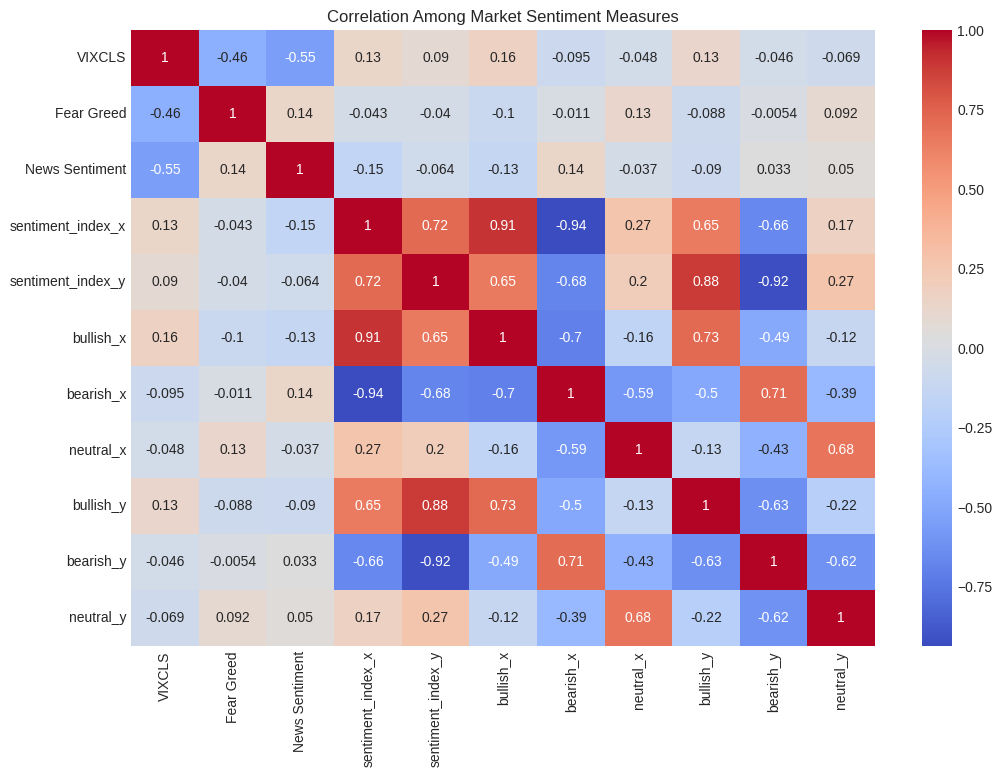

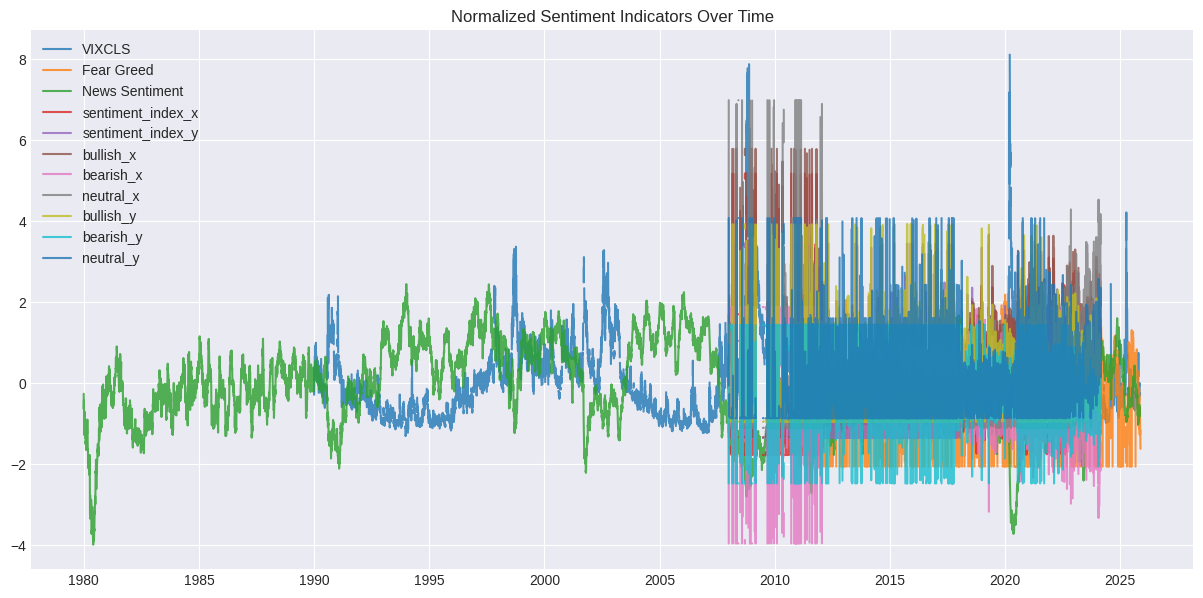

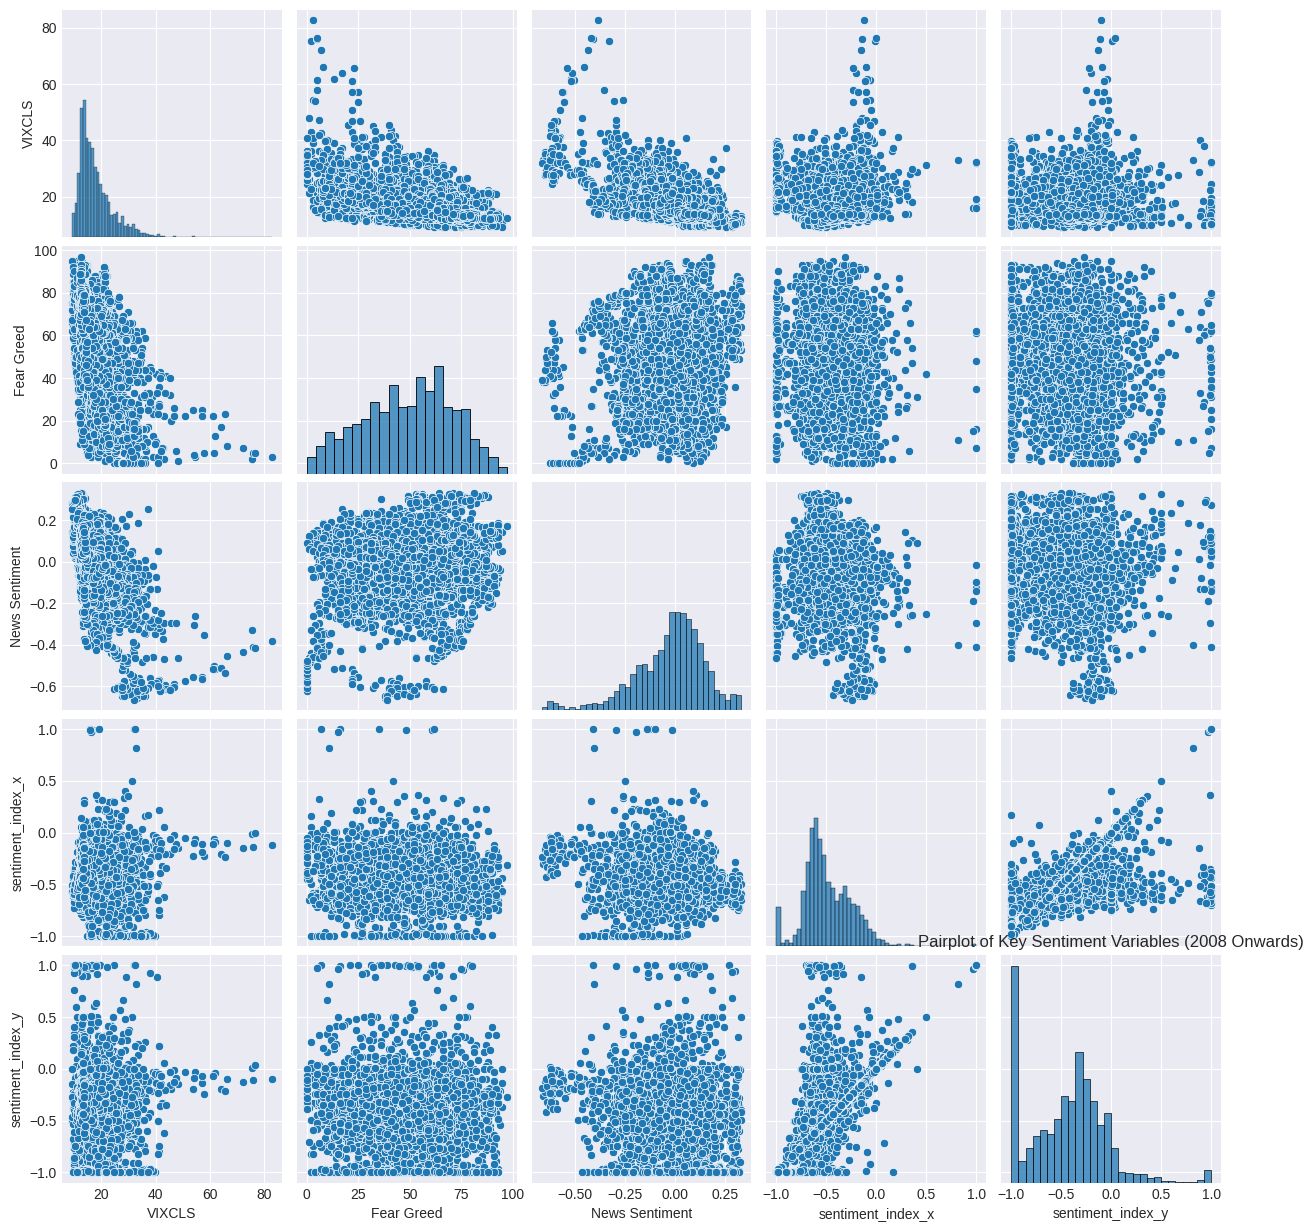

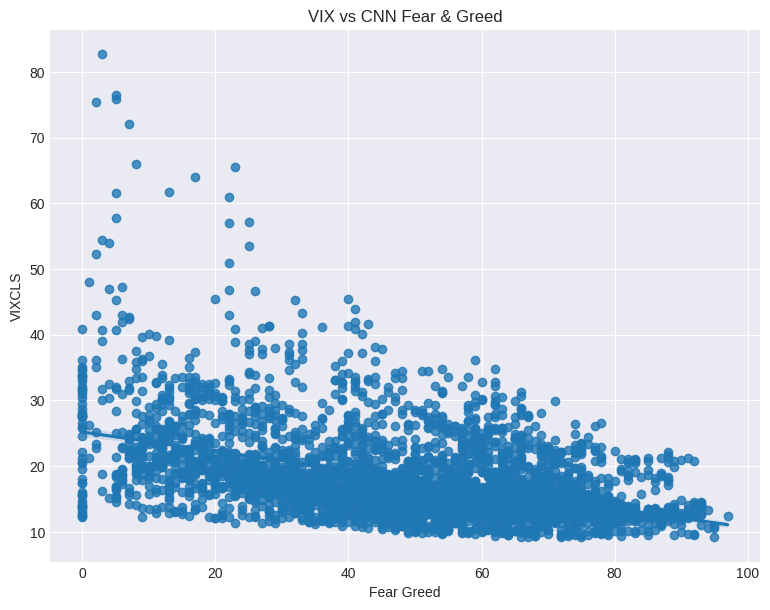

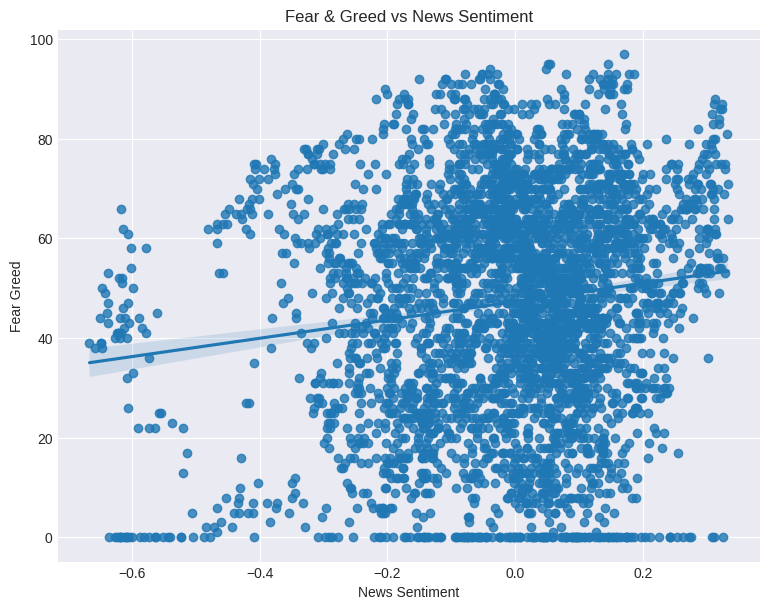


=== Correlation Ranking ===


Metric  Corr_with_VIX
0              VIXCLS       1.000000
5           bullish_x       0.160881
3   sentiment_index_x       0.134896
8           bullish_y       0.125870
4   sentiment_index_y       0.089908
9           bearish_y      -0.045867
7           neutral_x      -0.048185
10          neutral_y      -0.068548
6           bearish_x      -0.095031
1          Fear Greed      -0.457861
2      News Sentiment      -0.549626

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

plt.style.use("seaborn-v0_8-darkgrid")

# ---------------------------------------------
# 1. Pick key sentiment columns
# ---------------------------------------------
sentiment_cols = [
    'VIXCLS',
    'Fear Greed',
    'News Sentiment',
    'sentiment_index_x',
    'sentiment_index_y',
    'bullish_x', 'bearish_x', 'neutral_x',
    'bullish_y', 'bearish_y', 'neutral_y'
]

df_sent = merged_df[['date'] + sentiment_cols].copy()

# Filter to columns with at least 2000 non-missing values
valid_cols = [c for c in sentiment_cols if df_sent[c].notna().sum() > 2000]
df_valid = df_sent[valid_cols]

print("Columns used in correlation analysis:")
print(valid_cols)

# ---------------------------------------------
# 2. Correlation Heatmap
# ---------------------------------------------
plt.figure(figsize=(12, 8))
sns.heatmap(df_valid.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Among Market Sentiment Measures")
plt.show()

# ---------------------------------------------
# 3. Normalize & Plot Time Series
# ---------------------------------------------
df_norm = df_sent.set_index('date')[valid_cols].apply(lambda x: (x - x.mean()) / x.std())

plt.figure(figsize=(15, 7))
for col in valid_cols:
    plt.plot(df_norm.index, df_norm[col], label=col, alpha=0.8)
plt.title("Normalized Sentiment Indicators Over Time")
plt.legend()
plt.show()

# ---------------------------------------------
# 4. Pairplot of key sentiment variables (2008 onwards)
# ---------------------------------------------
df_sent_2008_onwards = df_sent[df_sent['date'].dt.year >= 2008].copy()
sns.pairplot(df_sent_2008_onwards[['VIXCLS', 'Fear Greed', 'News Sentiment',
                      'sentiment_index_x', 'sentiment_index_y']].dropna())
plt.title("Pairplot of Key Sentiment Variables (2008 Onwards)")
plt.show()

# ---------------------------------------------
# 5. Scatter: VIX vs Fear & Greed
# ---------------------------------------------
sns.lmplot(
    data=df_sent[['VIXCLS', 'Fear Greed']].dropna(),
    x='Fear Greed',
    y='VIXCLS',
    height=6,
    aspect=1.3
)
plt.title("VIX vs CNN Fear & Greed")
plt.show()

# ---------------------------------------------
# 6. Scatter: Fear & Greed vs News Sentiment
# ---------------------------------------------
sns.lmplot(
    data=df_sent[['Fear Greed', 'News Sentiment']].dropna(),
    x='News Sentiment',
    y='Fear Greed',
    height=6,
    aspect=1.3
)
plt.title("Fear & Greed vs News Sentiment")
plt.show()

# ---------------------------------------------
# 7. Correlation ranking with VIX & SP500 Close (if present)
# ---------------------------------------------
corr_table = pd.DataFrame({
    'Metric': valid_cols,
    'Corr_with_VIX': [df_sent[c].corr(df_sent['VIXCLS']) for c in valid_cols],
})

# Add SP500 if available
if 'SP500 Close' in merged_df.columns:
    corr_table['Corr_with_SP500'] = [
        df_sent[c].corr(merged_df['SP500 Close']) for c in valid_cols
    ]

print("\n=== Correlation Ranking ===")
display(corr_table.sort_values('Corr_with_VIX', ascending=False))

Columns with >=2000 non-missing obs (2008+):
['VIXCLS', 'Fear Greed', 'News Sentiment', 'sentiment_index_x', 'sentiment_index_y', 'bullish_x', 'bearish_x', 'neutral_x', 'bullish_y', 'bearish_y', 'neutral_y']


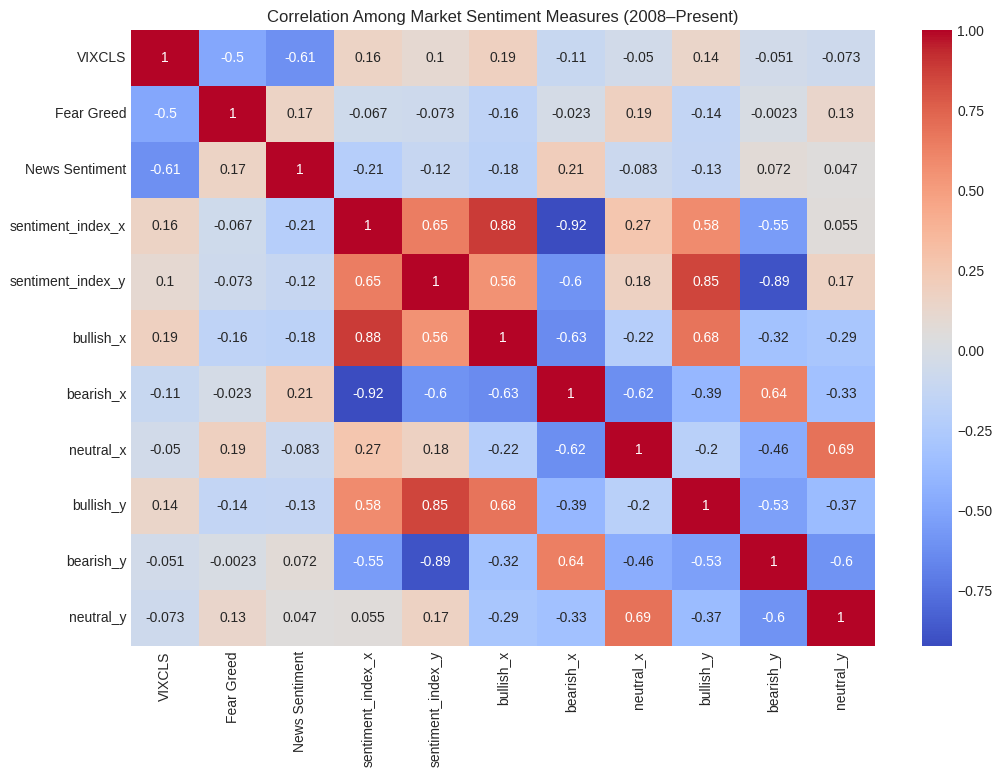

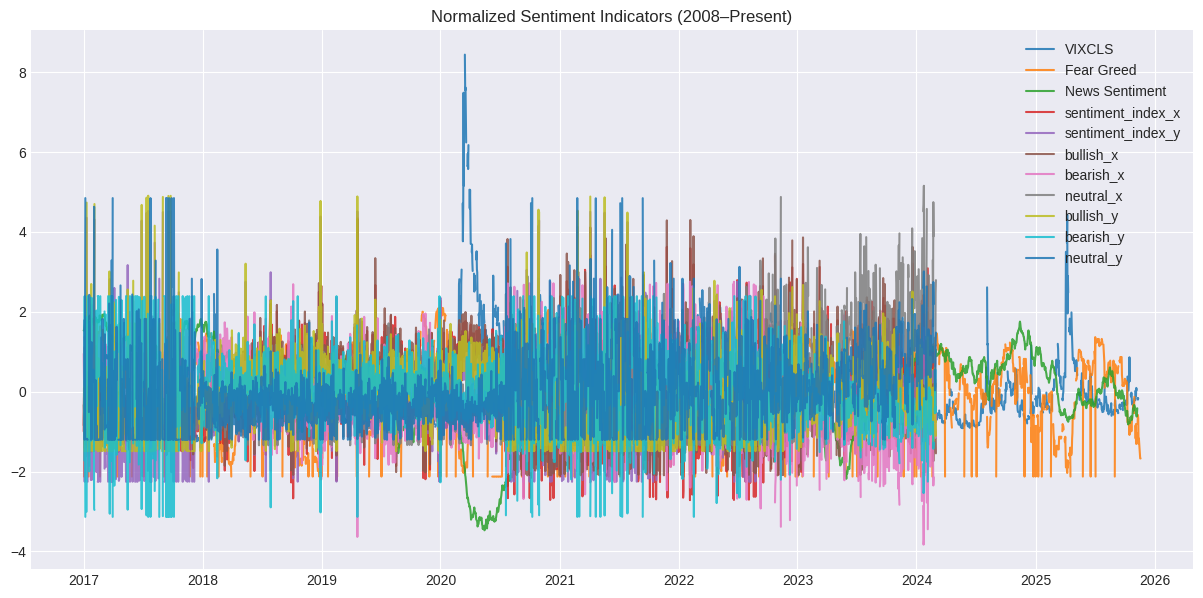

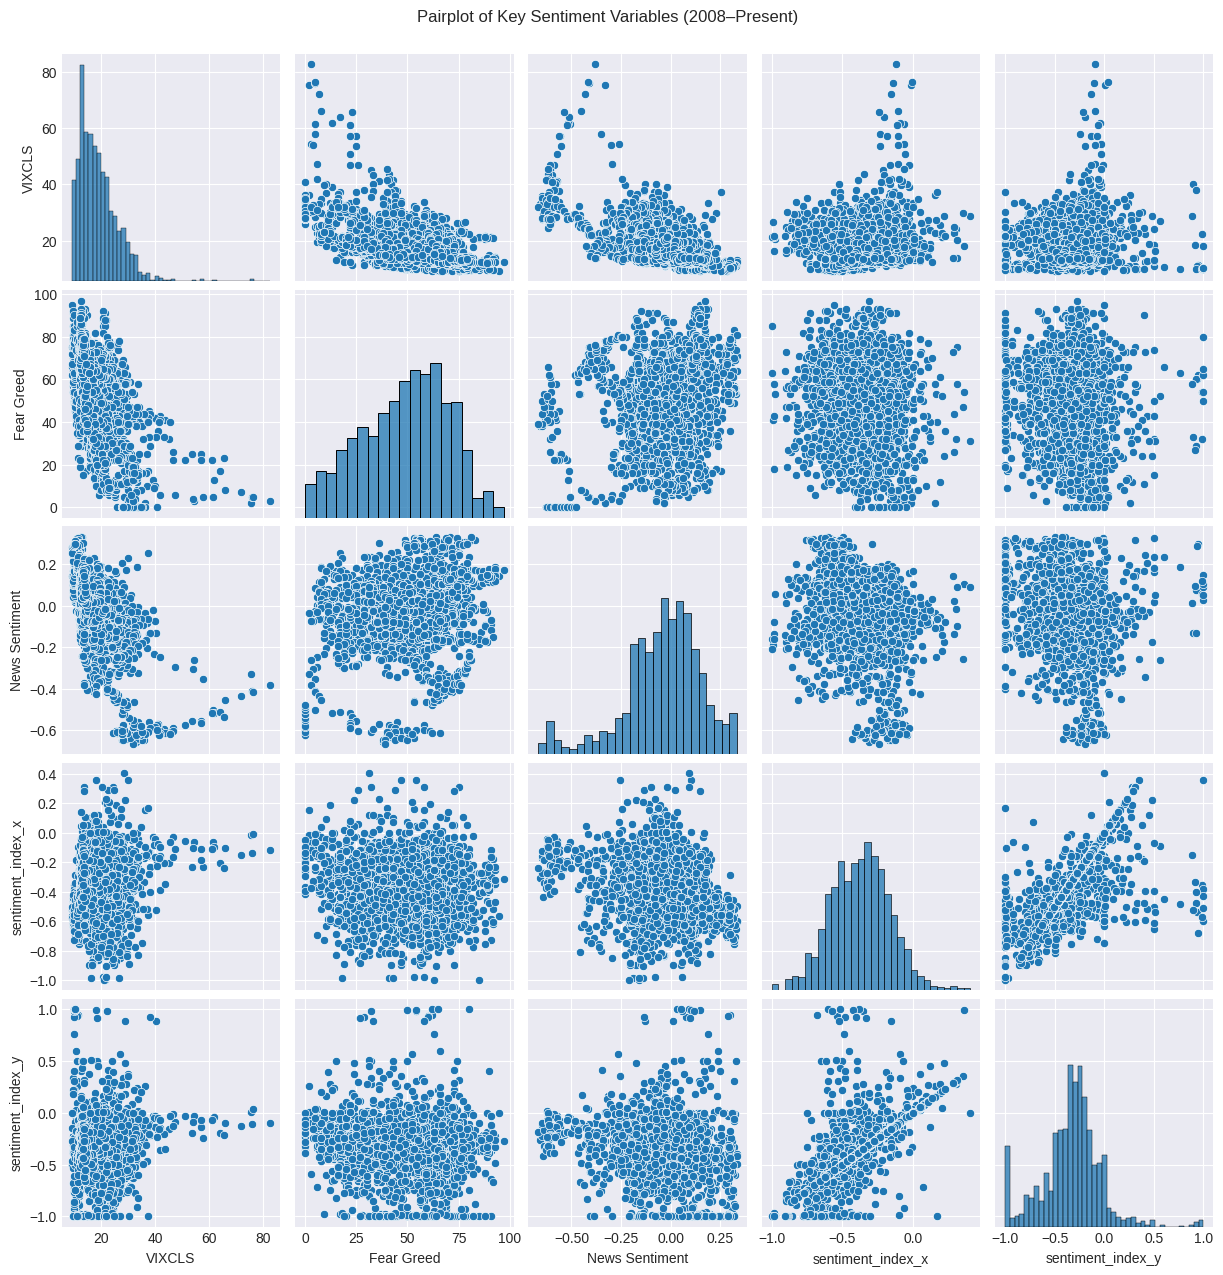

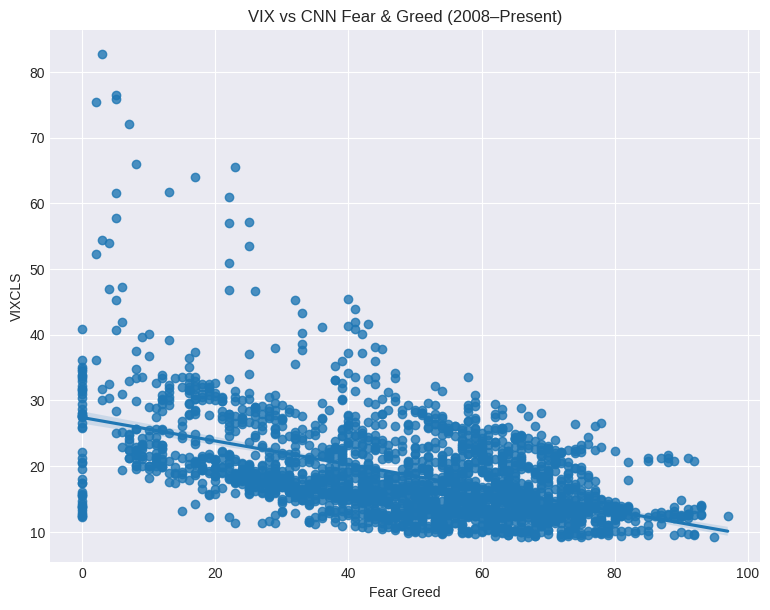

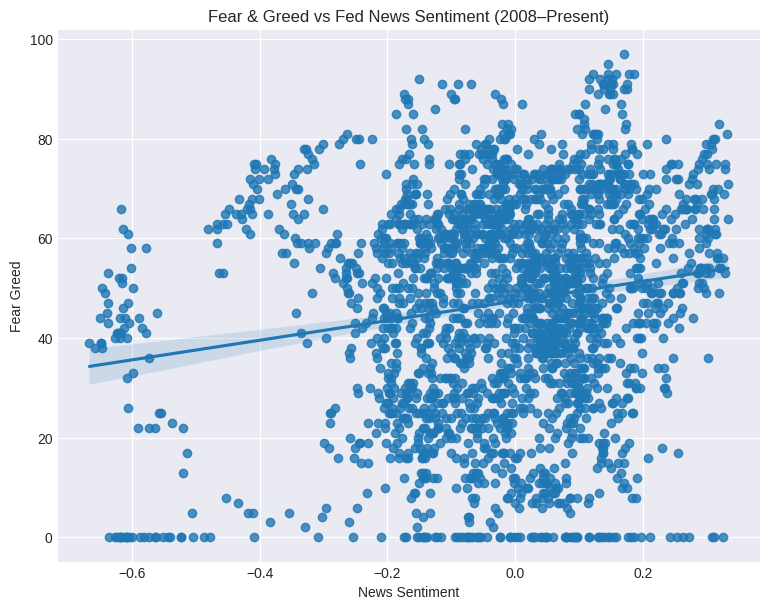


=== Correlation Ranking (2008–Present) ===


Metric  Corr_with_VIX
0              VIXCLS       1.000000
5           bullish_x       0.185447
3   sentiment_index_x       0.159131
8           bullish_y       0.136926
4   sentiment_index_y       0.103796
7           neutral_x      -0.049812
9           bearish_y      -0.050721
10          neutral_y      -0.072988
6           bearish_x      -0.108164
1          Fear Greed      -0.495263
2      News Sentiment      -0.610025

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

plt.style.use("seaborn-v0_8-darkgrid")

# =========================================================
#   FILTER DATA FROM 2008 ONWARD
# =========================================================
df_sent = merged_df[['date',
    'VIXCLS', 'Fear Greed', 'News Sentiment',
    'sentiment_index_x', 'sentiment_index_y',
    'bullish_x', 'bearish_x', 'neutral_x',
    'bullish_y', 'bearish_y', 'neutral_y'
]].copy()

df_2008 = df_sent[df_sent['date'] >= '2017-01-01'].copy()

# ---------------------------------------------------------
# 1. Select valid columns (>= 2000 observations AFTER 2008)
# ---------------------------------------------------------
sentiment_cols = [
    'VIXCLS', 'Fear Greed', 'News Sentiment',
    'sentiment_index_x', 'sentiment_index_y',
    'bullish_x', 'bearish_x', 'neutral_x',
    'bullish_y', 'bearish_y', 'neutral_y'
]

valid_cols = [c for c in sentiment_cols if df_2008[c].notna().sum() > 2000]
df_valid_2008 = df_2008[valid_cols]

print("Columns with >=2000 non-missing obs (2008+):")
print(valid_cols)

# ---------------------------------------------------------
# 2. Correlation Heatmap (2008+)
# ---------------------------------------------------------
plt.figure(figsize=(12, 8))
sns.heatmap(df_valid_2008.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Among Market Sentiment Measures (2008–Present)")
plt.show()

# ---------------------------------------------------------
# 3. Normalized Time Series Plot (2008+)
# ---------------------------------------------------------
df_norm_2008 = df_2008.set_index('date')[valid_cols].apply(
    lambda x: (x - x.mean()) / x.std()
)

plt.figure(figsize=(15, 7))
for col in valid_cols:
    plt.plot(df_norm_2008.index, df_norm_2008[col], label=col, alpha=0.85)

plt.title("Normalized Sentiment Indicators (2008–Present)")
plt.legend()
plt.show()

# ---------------------------------------------------------
# 4. Pairplot (2008+)
# ---------------------------------------------------------
sns.pairplot(
    df_2008[['VIXCLS', 'Fear Greed', 'News Sentiment',
             'sentiment_index_x', 'sentiment_index_y']].dropna()
)
plt.suptitle("Pairplot of Key Sentiment Variables (2008–Present)", y=1.02)
plt.show()

# ---------------------------------------------------------
# 5. Scatter: VIX vs Fear & Greed (2008+)
# ---------------------------------------------------------
sns.lmplot(
    data=df_2008[['VIXCLS', 'Fear Greed']].dropna(),
    x='Fear Greed',
    y='VIXCLS',
    height=6,
    aspect=1.3
)
plt.title("VIX vs CNN Fear & Greed (2008–Present)")
plt.show()

# ---------------------------------------------------------
# 6. Scatter: Fear & Greed vs News Sentiment (2008+)
# ---------------------------------------------------------
sns.lmplot(
    data=df_2008[['Fear Greed', 'News Sentiment']].dropna(),
    x='News Sentiment',
    y='Fear Greed',
    height=6,
    aspect=1.3
)
plt.title("Fear & Greed vs Fed News Sentiment (2008–Present)")
plt.show()

# ---------------------------------------------------------
# 7. Correlation Ranking (2008+)
# ---------------------------------------------------------
corr_table_2008 = pd.DataFrame({
    'Metric': valid_cols,
    'Corr_with_VIX': [df_2008[c].corr(df_2008['VIXCLS']) for c in valid_cols],
})

if 'SP500 Close' in merged_df.columns:
    corr_table_2008['Corr_with_SP500'] = [
        df_2008[c].corr(merged_df['SP500 Close']) for c in valid_cols
    ]

print("\n=== Correlation Ranking (2008–Present) ===")
display(corr_table_2008.sort_values('Corr_with_VIX', ascending=False))


Latest FinBERT sentiment date: 2024-03-04 00:00:00

=== Columns used for Most Recent 2 Years (Based on FinBERT data availability) ===
['VIXCLS', 'Fear Greed', 'News Sentiment', 'sentiment_index_x', 'sentiment_index_y', 'bullish_x', 'bearish_x', 'neutral_x', 'bullish_y', 'bearish_y', 'neutral_y']


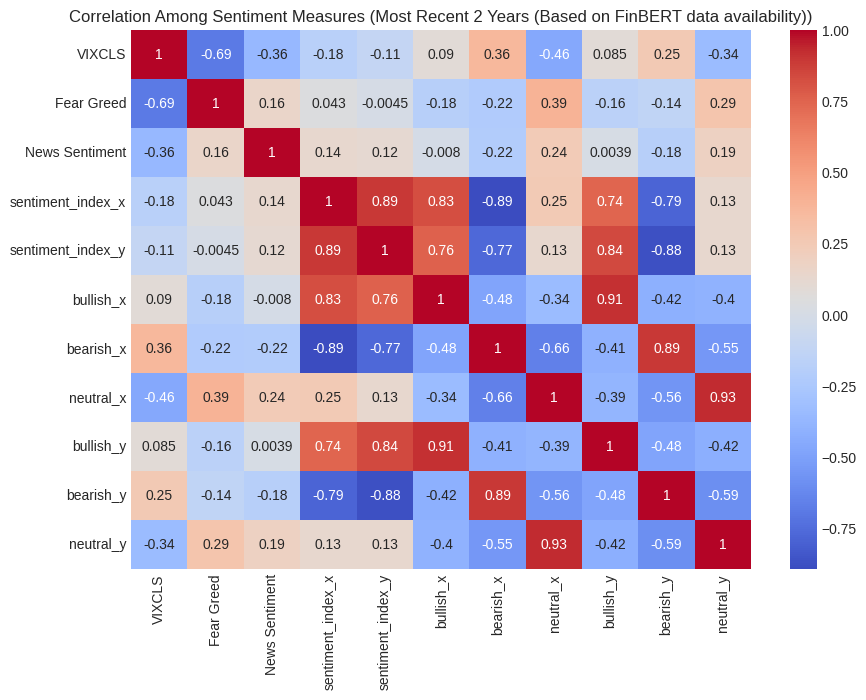

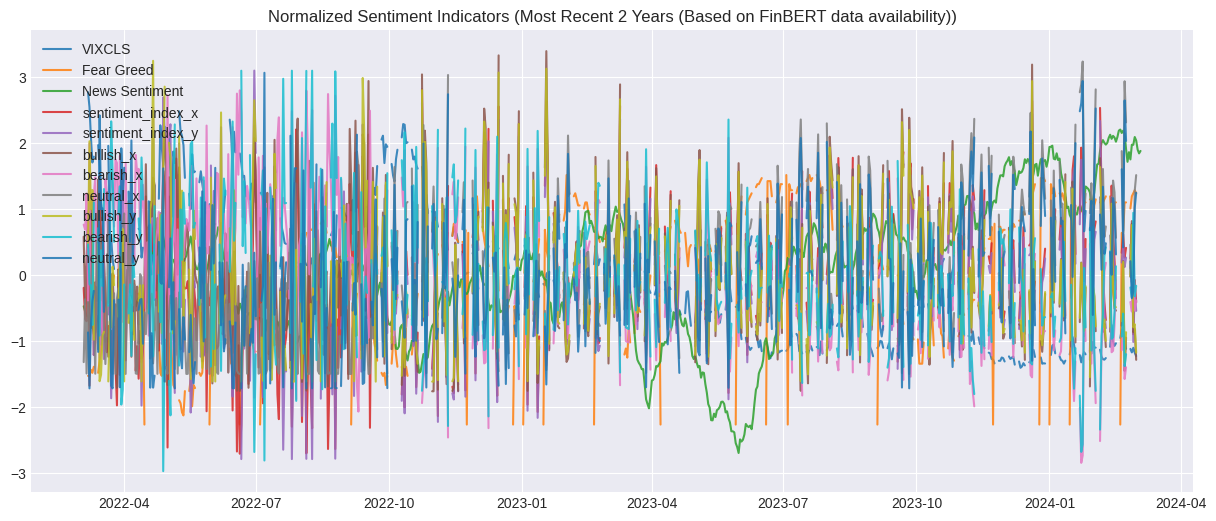

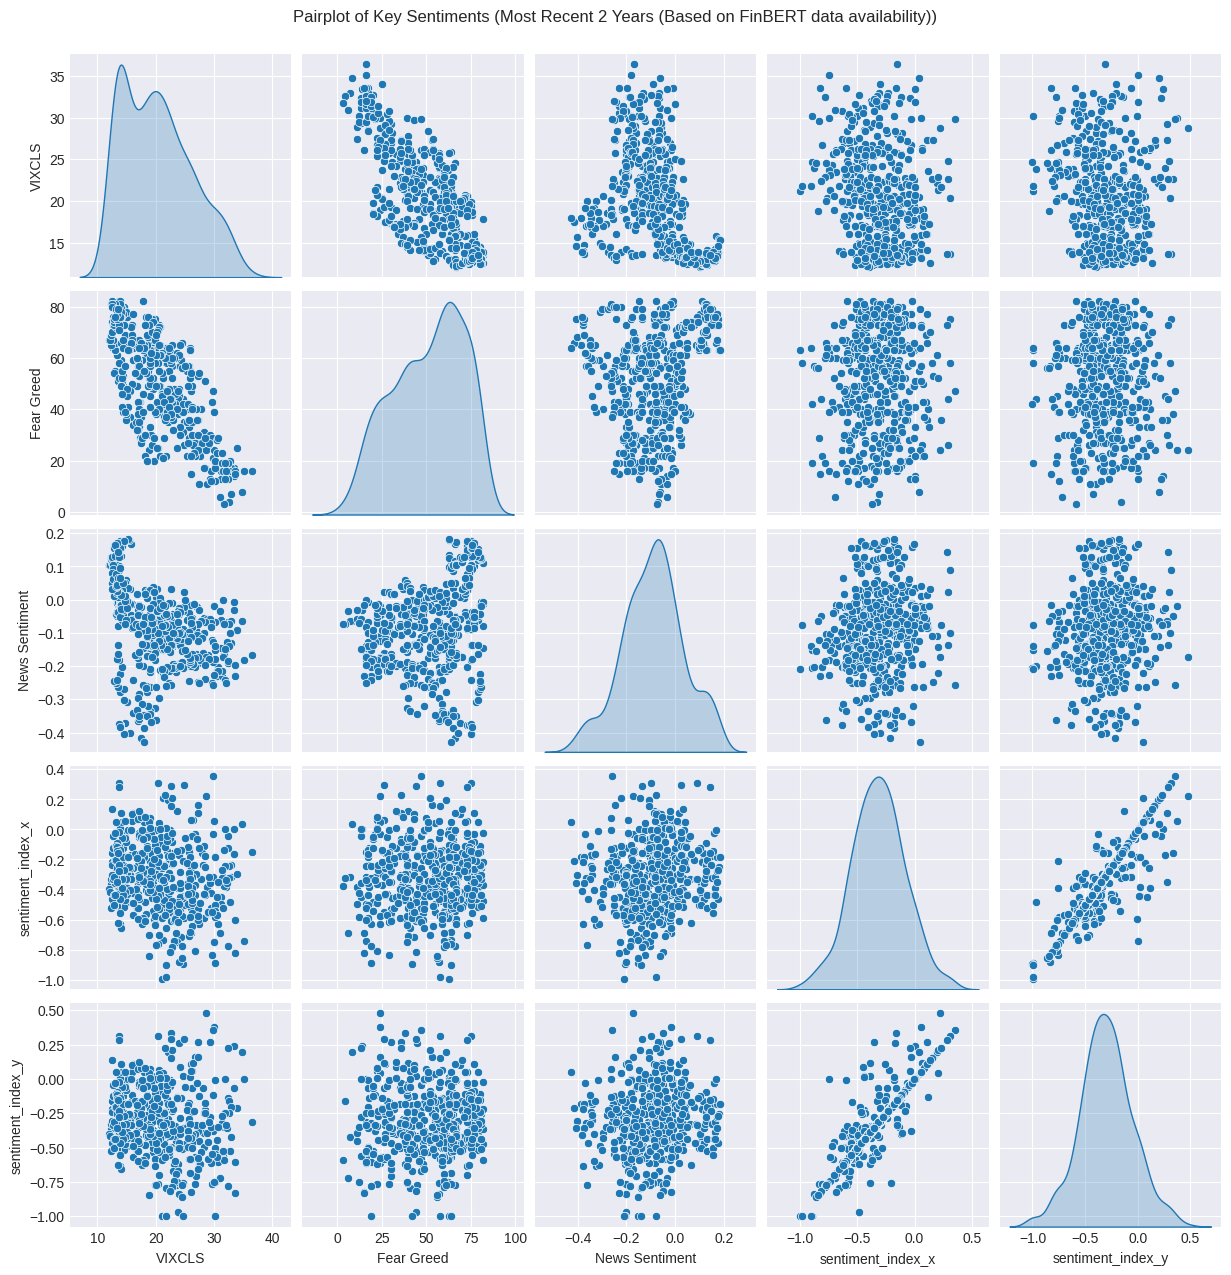

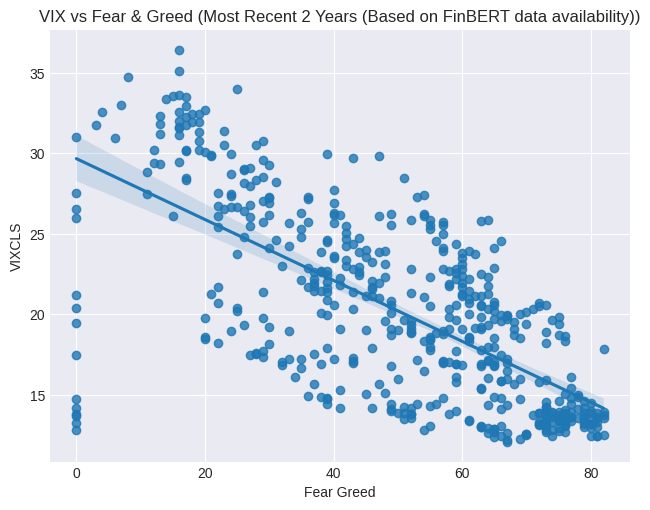

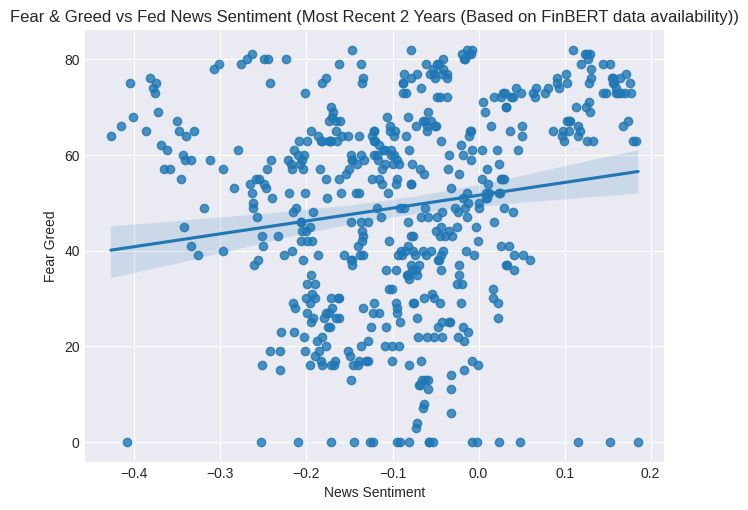


=== Correlation Ranking (Most Recent 2 Years (Based on FinBERT data availability)) ===


Metric  Corr_with_VIX
0              VIXCLS       1.000000
6           bearish_x       0.364927
9           bearish_y       0.254569
5           bullish_x       0.090368
8           bullish_y       0.085323
4   sentiment_index_y      -0.110013
3   sentiment_index_x      -0.181919
10          neutral_y      -0.341135
2      News Sentiment      -0.361531
7           neutral_x      -0.461067
1          Fear Greed      -0.685507


=== Columns used for Most Recent 1 Year (Based on FinBERT data availability) ===
['VIXCLS', 'Fear Greed', 'News Sentiment', 'sentiment_index_x', 'sentiment_index_y', 'bullish_x', 'bearish_x', 'neutral_x', 'bullish_y', 'bearish_y', 'neutral_y']


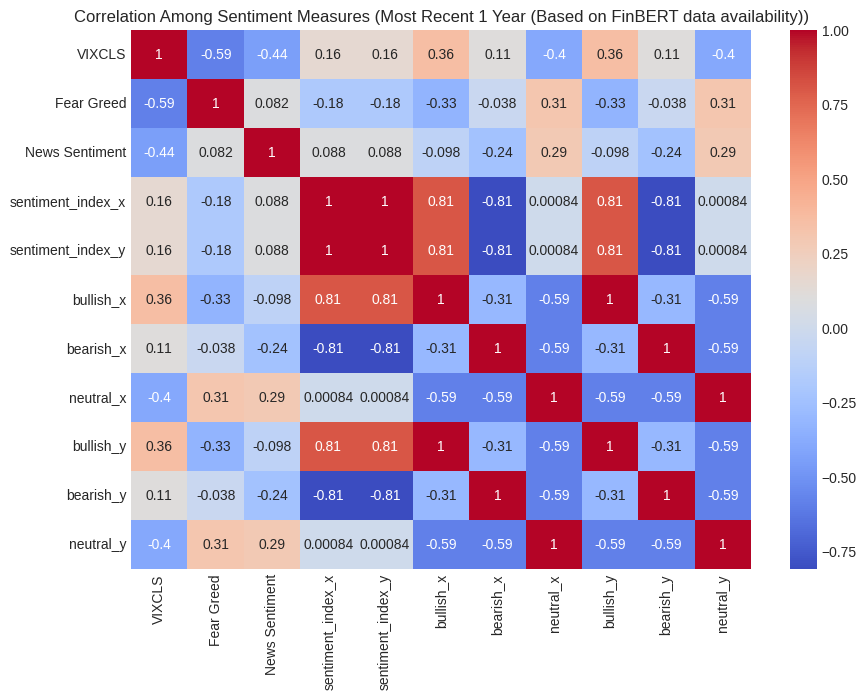

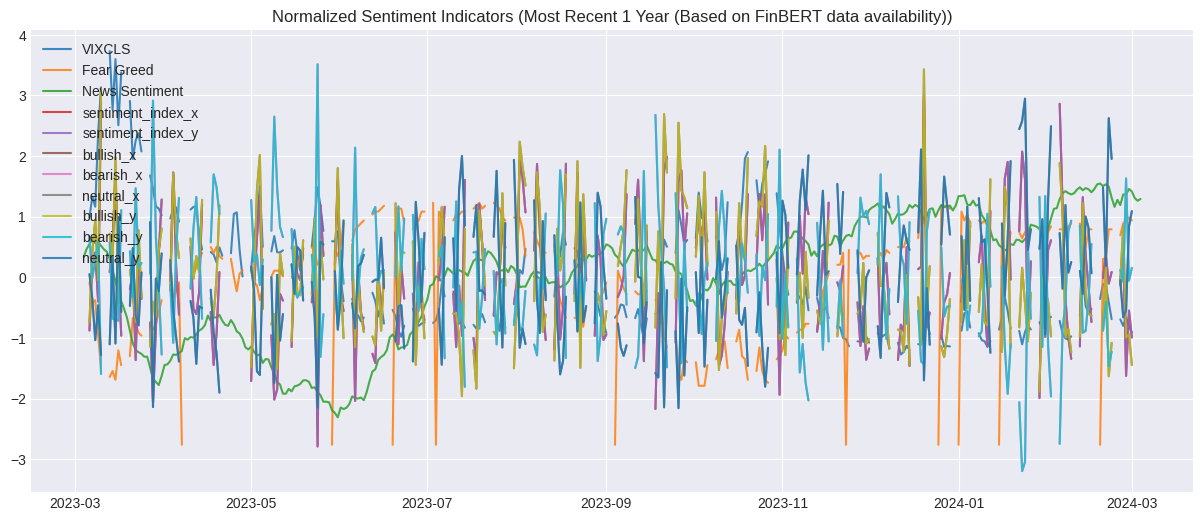

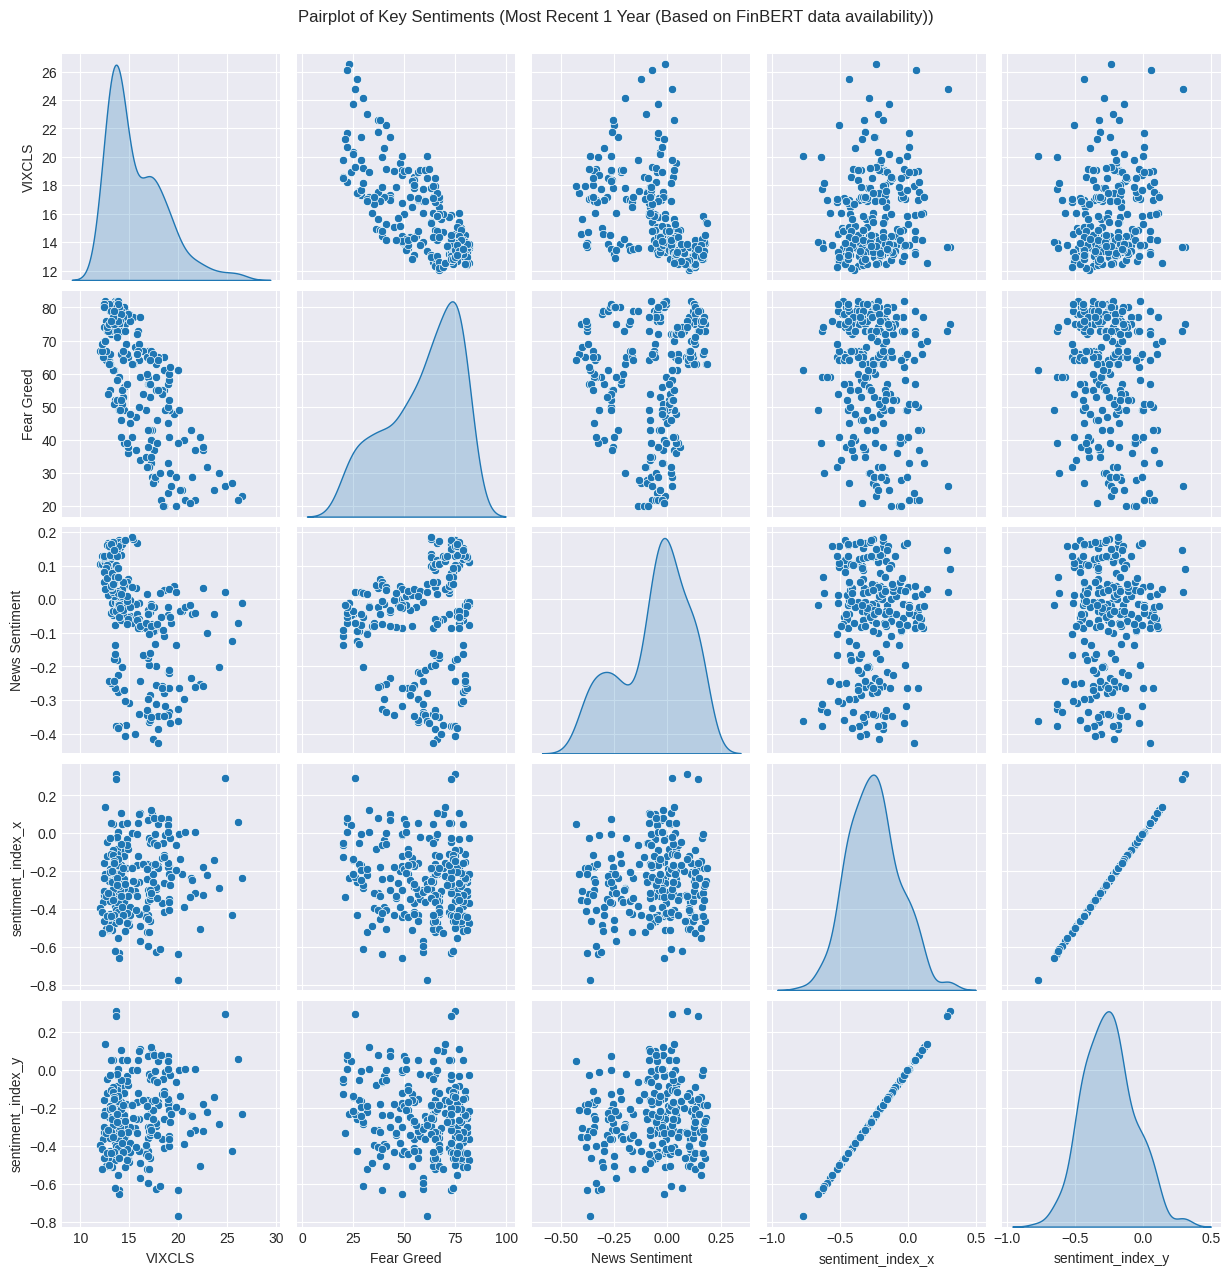

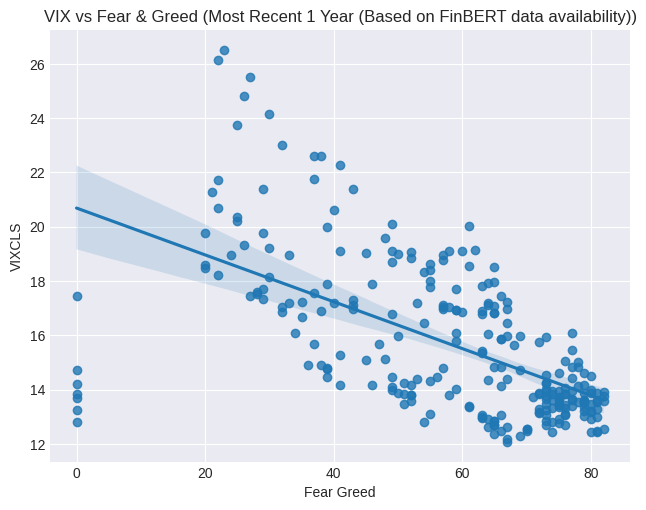

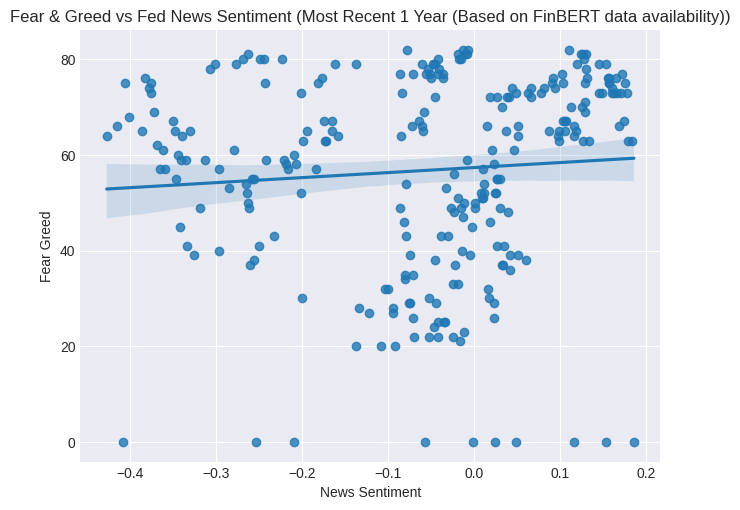


=== Correlation Ranking (Most Recent 1 Year (Based on FinBERT data availability)) ===


Metric  Corr_with_VIX
0              VIXCLS       1.000000
5           bullish_x       0.362387
8           bullish_y       0.362387
3   sentiment_index_x       0.158534
4   sentiment_index_y       0.158534
9           bearish_y       0.105911
6           bearish_x       0.105911
10          neutral_y      -0.397609
7           neutral_x      -0.397609
2      News Sentiment      -0.441271
1          Fear Greed      -0.588740

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-darkgrid")

# --------------------------------------------------------
# 1. BASE DF: sentiment subset
# --------------------------------------------------------
df_sent = merged_df[['date',
    'VIXCLS', 'Fear Greed', 'News Sentiment',
    'sentiment_index_x', 'sentiment_index_y',
    'bullish_x', 'bearish_x', 'neutral_x',
    'bullish_y', 'bearish_y', 'neutral_y'
]].copy()

df_sent['date'] = pd.to_datetime(df_sent['date'])
df_sent = df_sent.sort_values('date')

# --------------------------------------------------------
# 2. GET LATEST FINBERT DATE
# --------------------------------------------------------
latest_finbert_date = df_sent[
    (df_sent['sentiment_index_x'].notna()) |
    (df_sent['sentiment_index_y'].notna())
]['date'].max()

print("Latest FinBERT sentiment date:", latest_finbert_date)

# Build windows
start_2y = latest_finbert_date - pd.DateOffset(years=2)
start_1y = latest_finbert_date - pd.DateOffset(years=1)

df_2y = df_sent[df_sent['date'].between(start_2y, latest_finbert_date)].copy()
df_1y = df_sent[df_sent['date'].between(start_1y, latest_finbert_date)].copy()

# --------------------------------------------------------
# 3. Function to analyze sentiment windows
# --------------------------------------------------------
def run_sentiment_window(df_window, window_name):

    sentiment_cols = [
        'VIXCLS', 'Fear Greed', 'News Sentiment',
        'sentiment_index_x', 'sentiment_index_y',
        'bullish_x', 'bearish_x', 'neutral_x',
        'bullish_y', 'bearish_y', 'neutral_y'
    ]

    # Require >= 150 observations for short windows
    valid_cols = [c for c in sentiment_cols if df_window[c].notna().sum() >= 150]
    df_valid = df_window[valid_cols]

    print(f"\n=== Columns used for {window_name} ===")
    print(valid_cols)

    # ----------------- HEATMAP -----------------
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_valid.corr(), annot=True, cmap='coolwarm')
    plt.title(f"Correlation Among Sentiment Measures ({window_name})")
    plt.show()

    # ----------------- NORMALIZED TIME SERIES -----------------
    df_norm = df_window.set_index('date')[valid_cols].apply(lambda x: (x - x.mean()) / x.std())

    plt.figure(figsize=(15, 6))
    for col in valid_cols:
        plt.plot(df_norm.index, df_norm[col], label=col, alpha=0.85)
    plt.legend()
    plt.title(f"Normalized Sentiment Indicators ({window_name})")
    plt.show()

    # ----------------- PAIRPLOT -----------------
    core_cols = ['VIXCLS', 'Fear Greed', 'News Sentiment',
                 'sentiment_index_x', 'sentiment_index_y']
    core_cols = [c for c in core_cols if c in valid_cols]

    if len(core_cols) >= 2:
        sns.pairplot(df_window[core_cols].dropna(), diag_kind='kde')
        plt.suptitle(f"Pairplot of Key Sentiments ({window_name})", y=1.02)
        plt.show()

    # ----------------- SCATTER: VIX vs F&G -----------------
    sns.lmplot(
        data=df_window[['VIXCLS','Fear Greed']].dropna(),
        x='Fear Greed', y='VIXCLS',
        height=5, aspect=1.3
    )
    plt.title(f"VIX vs Fear & Greed ({window_name})")
    plt.show()

    # ----------------- SCATTER: F&G vs News Sentiment -----------------
    sns.lmplot(
        data=df_window[['Fear Greed','News Sentiment']].dropna(),
        x='News Sentiment', y='Fear Greed',
        height=5, aspect=1.3
    )
    plt.title(f"Fear & Greed vs Fed News Sentiment ({window_name})")
    plt.show()

    # ----------------- CORRELATION RANKING -----------------
    corr_table = pd.DataFrame({
        'Metric': valid_cols,
        'Corr_with_VIX': [df_window[c].corr(df_window['VIXCLS']) for c in valid_cols]
    })

    print(f"\n=== Correlation Ranking ({window_name}) ===")
    display(corr_table.sort_values('Corr_with_VIX', ascending=False))


# --------------------------------------------------------
# 4. RUN FOR MOST RECENT WINDOWS BASED ON FINBERT AVAILABILITY
# --------------------------------------------------------
run_sentiment_window(df_2y, "Most Recent 2 Years (Based on FinBERT data availability)")
run_sentiment_window(df_1y, "Most Recent 1 Year (Based on FinBERT data availability)")



In [ ]:
import pandas as pd

# Start with your merged_df
df = merged_df.copy()

# --- Rename FinBERT_x (from master headlines) ---
df = df.rename(columns={
    "bullish_x": "finbert_v1_bullish",
    "bearish_x": "finbert_v1_bearish",
    "neutral_x": "finbert_v1_neutral",
    "sentiment_index_x": "finbert_v1_index",
    "sentiment_scaled_x": "finbert_v1_scaled",
    "sentiment_smoothed_7d_x": "finbert_v1_smooth7",
    "sentiment_smoothed_30d_x": "finbert_v1_smooth30",

    # FinBERT_y (CSV-only headlines)
    "bullish_y": "finbert_v2_bullish",
    "bearish_y": "finbert_v2_bearish",
    "neutral_y": "finbert_v2_neutral",
    "sentiment_index_y": "finbert_v2_index",
    "sentiment_scaled_y": "finbert_v2_scaled",
    "sentiment_smoothed_7d_y": "finbert_v2_smooth7",
    "sentiment_smoothed_30d_y": "finbert_v2_smooth30",
})

# Keep only relevant columns
sentiment_cols = [
    "date",
    "VIXCLS",
    "Fear Greed",
    "News Sentiment",

    # FinBERT V1
    "finbert_v1_bullish",
    "finbert_v1_bearish",
    "finbert_v1_neutral",
    "finbert_v1_index",
    "finbert_v1_scaled",
    "finbert_v1_smooth7",
    "finbert_v1_smooth30",

    # FinBERT V2
    "finbert_v2_bullish",
    "finbert_v2_bearish",
    "finbert_v2_neutral",
    "finbert_v2_index",
    "finbert_v2_scaled",
    "finbert_v2_smooth7",
    "finbert_v2_smooth30",
]

sentiment_features = df[sentiment_cols].copy()
sentiment_features = sentiment_features.sort_values("date").reset_index(drop=True)

# Save
sentiment_features.to_csv("sentiment_features_daily.csv", index=False)

print("final_sentiment_features_daily.csv")
print(sentiment_features.head(10))


✅ Saved → sentiment_features_daily.csv
        date  VIXCLS  Fear Greed  News Sentiment  finbert_v1_bullish  \
0 1980-01-01     NaN         NaN       -0.037941                 NaN   
1 1980-01-02     NaN         NaN       -0.106681                 NaN   
2 1980-01-03     NaN         NaN       -0.089540                 NaN   
3 1980-01-05     NaN         NaN       -0.067275                 NaN   
4 1980-01-06     NaN         NaN       -0.089171                 NaN   
5 1980-01-07     NaN         NaN       -0.127327                 NaN   
6 1980-01-08     NaN         NaN       -0.196367                 NaN   
7 1980-01-09     NaN         NaN       -0.219420                 NaN   
8 1980-01-10     NaN         NaN       -0.202393                 NaN   
9 1980-01-11     NaN         NaN       -0.222641                 NaN   

   finbert_v1_bearish  finbert_v1_neutral  finbert_v1_index  \
0                 NaN                 NaN               NaN   
1                 NaN                 NaN 

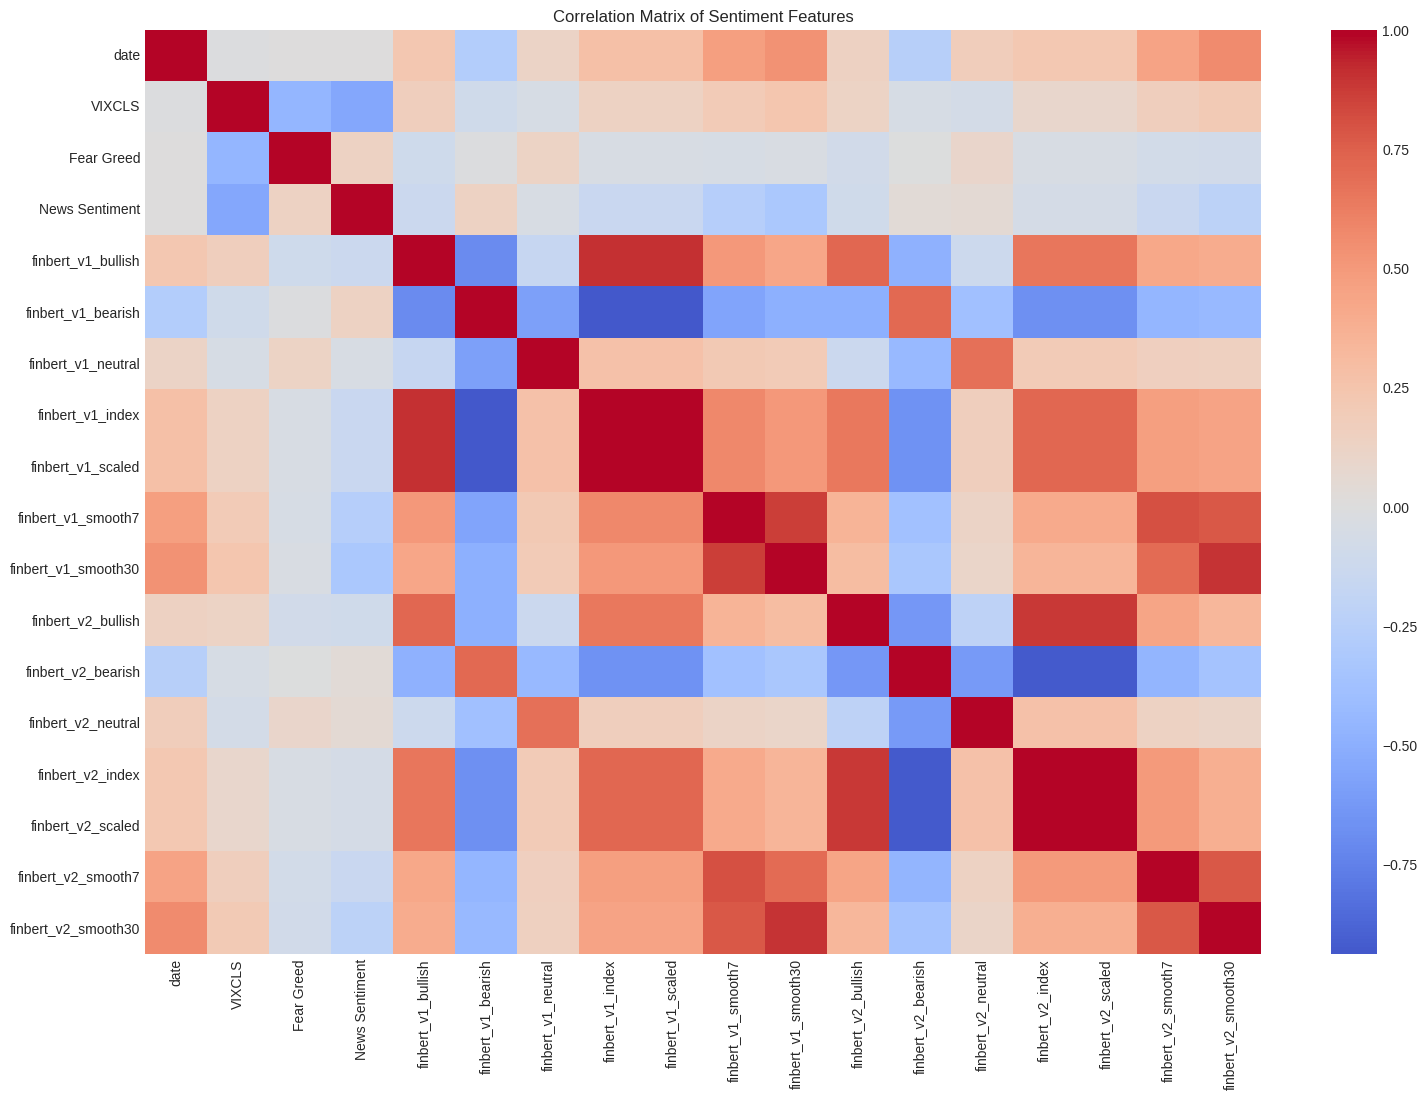

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlations
corr = sentiment_features.corr()

plt.figure(figsize=(18, 12))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Sentiment Features")
plt.show()


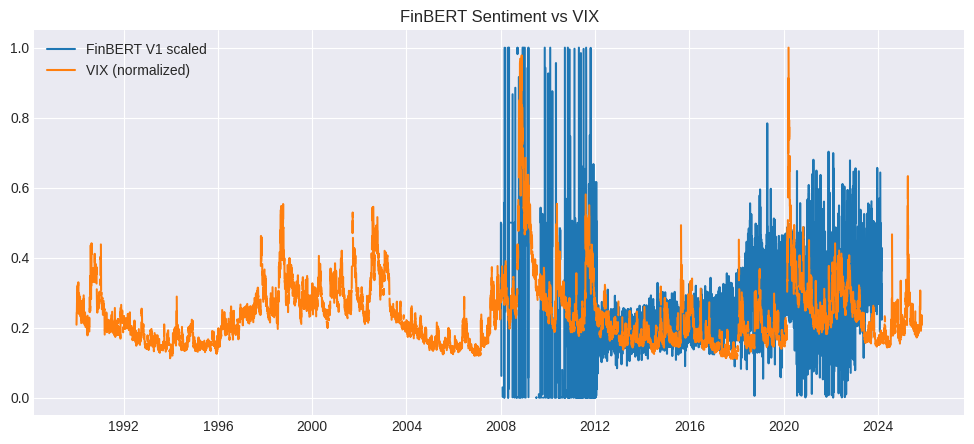

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(sentiment_features["date"], sentiment_features["finbert_v1_scaled"], label="FinBERT V1 scaled")
plt.plot(sentiment_features["date"], sentiment_features["VIXCLS"] / sentiment_features["VIXCLS"].max(), label="VIX (normalized)")

plt.legend()
plt.title("FinBERT Sentiment vs VIX")
plt.show()


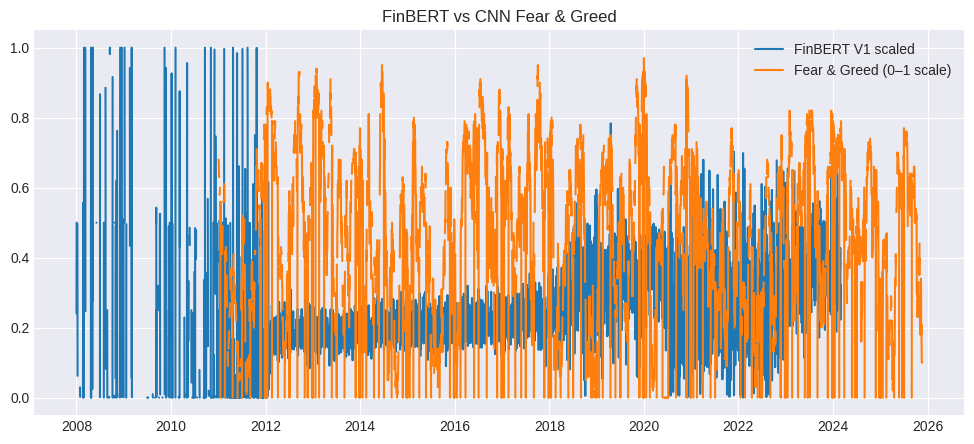

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(sentiment_features["date"], sentiment_features["finbert_v1_scaled"], label="FinBERT V1 scaled")
plt.plot(sentiment_features["date"], sentiment_features["Fear Greed"]/100, label="Fear & Greed (0–1 scale)")

plt.legend()
plt.title("FinBERT vs CNN Fear & Greed")
plt.show()


# AI Appendix

Portions of this project were developed with assistance from AI tools (ChatGPT). AI was used primarily for debugging help, code structuring ideas, generating boilerplate code patterns, and clarifying Python, pandas, and TensorFlow syntax. All core logic, including data engineering design, anchor-based feature calculations, trade-segmentation framework, model selection, and evaluation methodology was designed, implemented, and validated by our team. Any AI-generated code snippets were reviewed, modified, and integrated manually to ensure correctness, interpretability, and alignment with our methodological goals. All conceptual decisions, modeling choices, and analysis were performed by the authors.